# ランダムフォレスト（クラス分類）

## ライブラリのimport

In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn import model_selection

## データを読み込み

digitsはmnistを更に小さくしたデータセットです。

mnist.dataには64個の要素を持った一次元配列が1797個入っています。

64個の要素というのは、8x8のピクセル（白黒）を表しているので、matplotlibで簡単に元の画像を確認できます。

In [2]:
mnist = datasets.load_digits()
train_images, test_images, train_labels, test_labels = model_selection.train_test_split(mnist.data, mnist.target, test_size=0.2)

train_labels.size+test_labels.size

1797

## 学習データの可視化

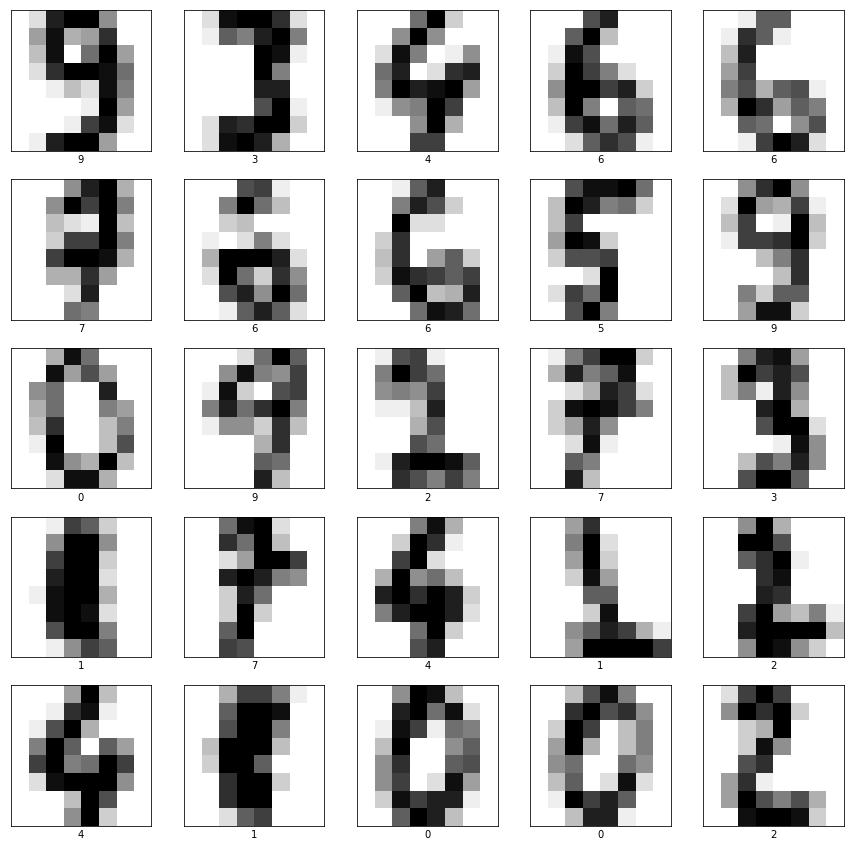

In [3]:
plt.figure(figsize=(15,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i].reshape((8,8)), cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])

## ランダムフォレストの学習
① sklearnの機械学習モデルのインスタンスを作成して  
② 教師データと教師ラベルを使って学習

In [4]:
clf = RFC(verbose=True, n_jobs=-1, random_state=2525)
clf.fit(train_images, train_labels)

[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=2525, verbose=True,
            warm_start=False)

## 学習済みランダムフォレストの評価

テストデータのラベルを予測

In [5]:
predicted_labels = clf.predict(test_images)

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


テストデータの認識率を計算

In [6]:
print(f"acc: {clf.score(test_images, test_labels)}")

[Parallel(n_jobs=10)]: Done   2 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished


acc: 0.9388888888888889


## テストデータと予測ラベルの可視化

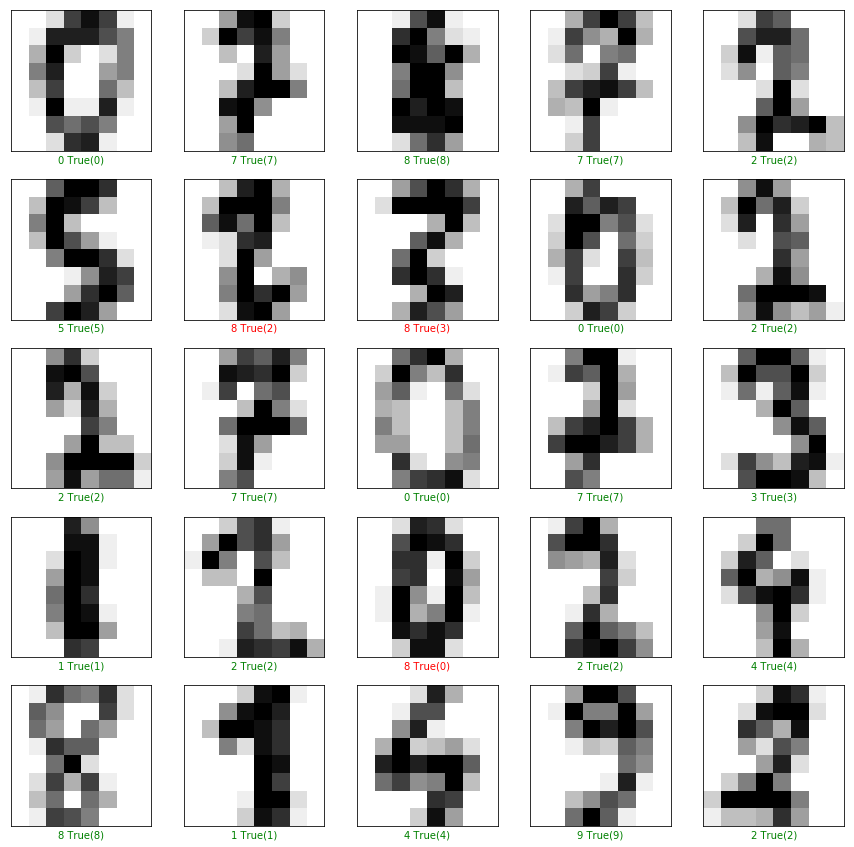

In [7]:
plt.figure(figsize=(15,15))

# 先頭から25枚テストデータを可視化
for i in range(25):
    
    # 画像を作成
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape((8,8)), cmap=plt.cm.binary)
    
    # 今プロットを作っている画像データの予測ラベルと正解ラベルをセット
    predicted_label = predicted_labels[i]
    true_label      = test_labels[i]
    
    # 予測ラベルが正解なら緑、不正解なら赤色を使う
    if predicted_label == true_label:
        color = 'green' # True label color
    else:
        color = 'red'   # False label color
    plt.xlabel("{} True({})".format(predicted_label, 
                                  true_label),
                                  color=color)

## GridSearchでパラメタ探索

ほぼここの内容通り http://blog.tatsushim.com/?p=63

下のプログラムは実行するパソコンによってはとっても時間がかかるので注意！

In [8]:
from sklearn.grid_search import GridSearchCV

/root/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/root/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


探索するパラメータを辞書型で決めます。

In [9]:
search_params = {
     'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
        'max_features'      : [3, 5, 10, 15, 20],
        'random_state'      : [2525],
        'n_jobs'            : [1],
        'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
        'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}

グリッドサーチクラスからインスタンスを作って（この際に探索対象の機械学習モデルのクラスと、先程作ったパラメータ辞書を渡します）

普通のsklearnのモデルと同様にfitします。

In [10]:
gs = GridSearchCV(RFC(), 
                  search_params,
                  cv=3,
                  verbose=True, 
                  n_jobs=-1)
gs.fit(train_images, train_labels)
 
print(gs.best_estimator_)

Fitting 3 folds for each of 3500 candidates, totalling 10500 fits


[Parallel(n_jobs=-1)]: Done  23 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 1139 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 1903 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done 2603 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 3503 tasks      | elapsed:   43.5s
[Parallel(n_jobs=-1)]: Done 4603 tasks      | elapsed:   58.4s
[Parallel(n_jobs=-1)]: Done 5903 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 7403 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 9103 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 10469 out of 10500 | elapsed:  2.3min remaining:    0.4s
[Parallel(n_jobs=-1)]: Done 10500 out of 10500 | elapsed:  2.3min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=15, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=2525, verbose=0,
            warm_start=False)


最も良い性能を叩き出したモデルが best_estimator_に入っています。

In [11]:
gs.best_estimator_.score(test_images, test_labels)

0.9833333333333333

In [12]:
predicted_labels = gs.best_estimator_.predict(test_images)

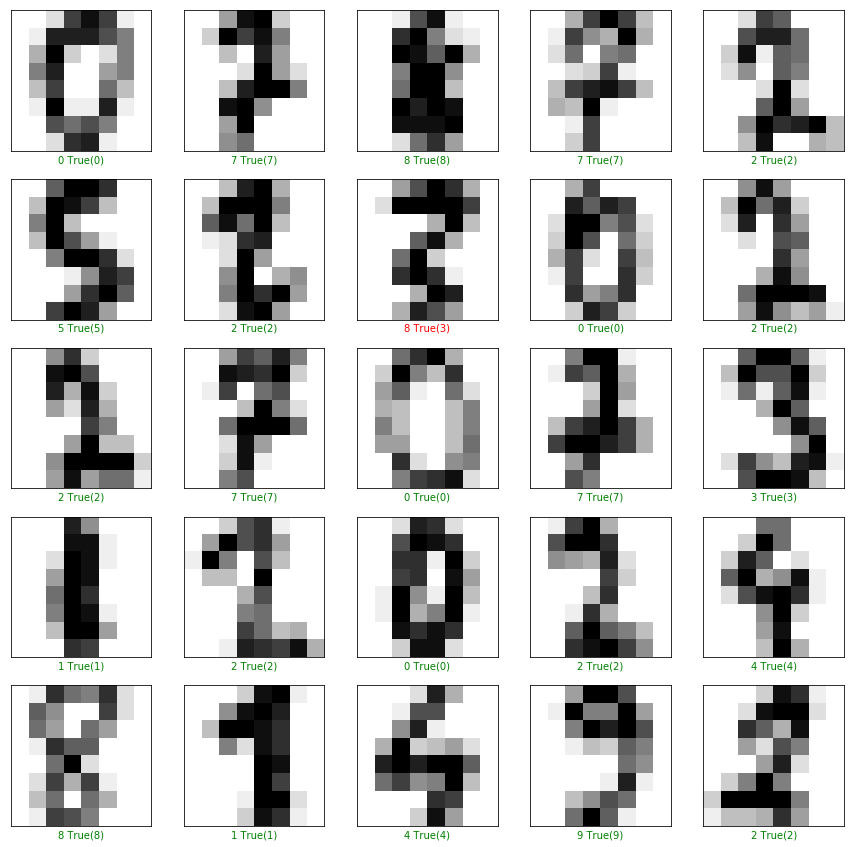

In [13]:
plt.figure(figsize=(15,15))

# 先頭から25枚テストデータを可視化
for i in range(25):
    
    # 画像を作成
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_images[i].reshape((8,8)), cmap=plt.cm.binary)
    
    # 今プロットを作っている画像データの予測ラベルと正解ラベルをセット
    predicted_label = predicted_labels[i]
    true_label      = test_labels[i]
    
    # 予測ラベルが正解なら緑、不正解なら赤色を使う
    if predicted_label == true_label:
        color = 'green' # True label color
    else:
        color = 'red'   # False label color
    plt.xlabel("{} True({})".format(predicted_label, 
                                  true_label),
                                  color=color)

予測ラベルをコンフュージョンマトリックスでチェックしてみましょう。

In [14]:
from sklearn.metrics import confusion_matrix

confusion_matrix(test_labels, predicted_labels)

array([[37,  0,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0, 34,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 36,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 37,  0,  1,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 33,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 28,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 32,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 44,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  1, 40,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  0, 33]])

# ランダムフォレスト（回帰）

### データの読み込み

ここでは、回帰の問題にbostonデータセットを使います。 

In [15]:
boston = datasets.load_boston()
train_data_bs, test_data_bs, train_labels_bs, test_labels_bs \
= model_selection.train_test_split(boston.data, boston.target, test_size=0.2)

### ランダムフォレスト回帰の学習と評価

In [16]:
rg = RFR(n_jobs=-1, random_state=2525)

rg.fit(train_data_bs,train_labels_bs)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=2525, verbose=0, warm_start=False)

In [17]:
predicted_labels_bs = rg.predict(test_data_bs)

In [18]:
rg.score(test_data_bs, test_labels_bs)

0.8990061828425416

### 結果の可視化

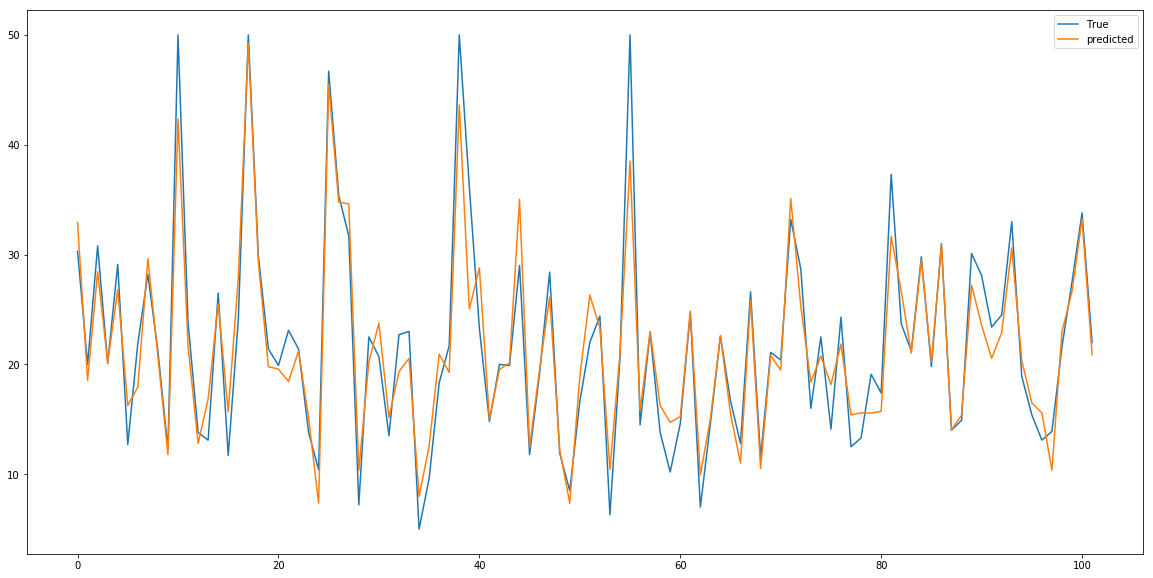

In [19]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(predicted_labels_bs, label="predicted")
plt.legend()

## グリッドサーチでパラメタを探索

In [20]:
search_params = {
    'n_estimators'      : [5, 10, 20, 30, 50, 100, 300],
    'max_features'      : [i for i in range(1,train_data_bs.shape[1])],
    'random_state'      : [2525],
    'n_jobs'            : [1],
    'min_samples_split' : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100],
    'max_depth'         : [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]
}

In [21]:
gsr = GridSearchCV(
    RFR(),
    search_params,
    cv = 3,
    n_jobs = -1,
    verbose=True
)

gsr.fit(train_data_bs, train_labels_bs)

Fitting 3 folds for each of 8400 candidates, totalling 25200 fits


[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 1341 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 3091 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 5261 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 6611 tasks      | elapsed:   45.6s
[Parallel(n_jobs=-1)]: Done 8261 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 10211 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 12461 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 15011 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 17861 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 21011 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 24461 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 25169 out of 25200 | elapsed:  3.1min remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 25200 out of 25200 | elapsed:  3.1min finished


GridSearchCV(cv=3, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_estimators': [5, 10, 20, 30, 50, 100, 300], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'random_state': [2525], 'n_jobs': [1], 'min_samples_split': [3, 5, 10, 15, 20, 25, 30, 40, 50, 100], 'max_depth': [3, 5, 10, 15, 20, 25, 30, 40, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [22]:
print(gsr.best_estimator_)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=10,
           max_features=6, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=30, n_jobs=1, oob_score=False, random_state=2525,
           verbose=0, warm_start=False)


In [23]:
gsr.best_estimator_.score(test_data_bs, test_labels_bs)

0.8735585497181674

In [24]:
predicted_labels_bs2 = gsr.best_estimator_.predict(test_data_bs)

### ランダムフォスレスト回帰の予測結果を可視化

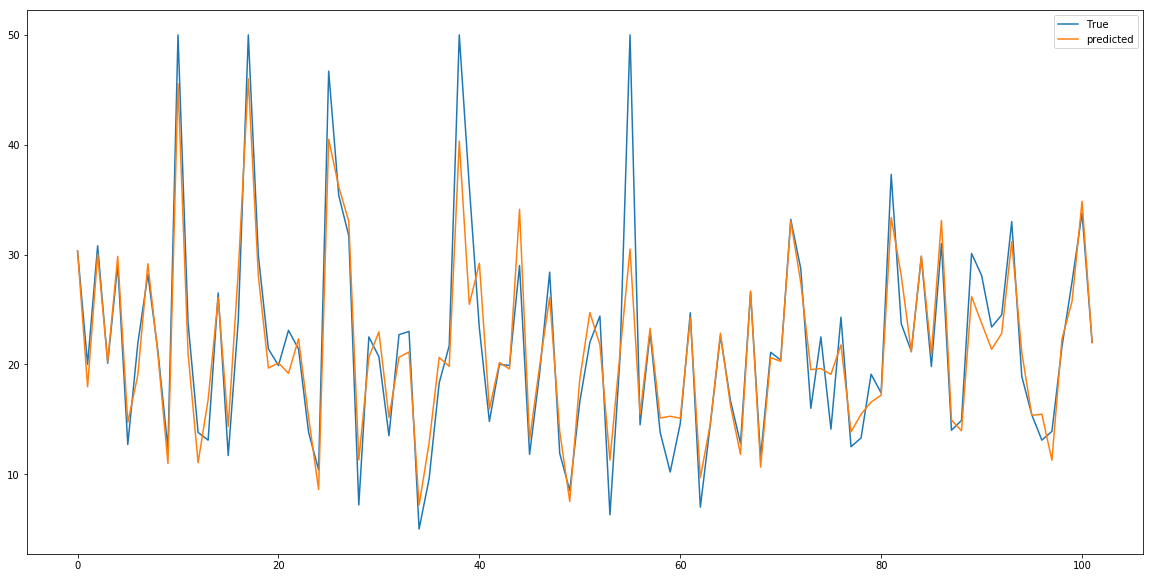

In [25]:
plt.figure(figsize=(20,10))
plt.plot(test_labels_bs,label="True")
plt.plot(predicted_labels_bs2, label="predicted")
plt.legend()